# S&P 500 Stock Market case study

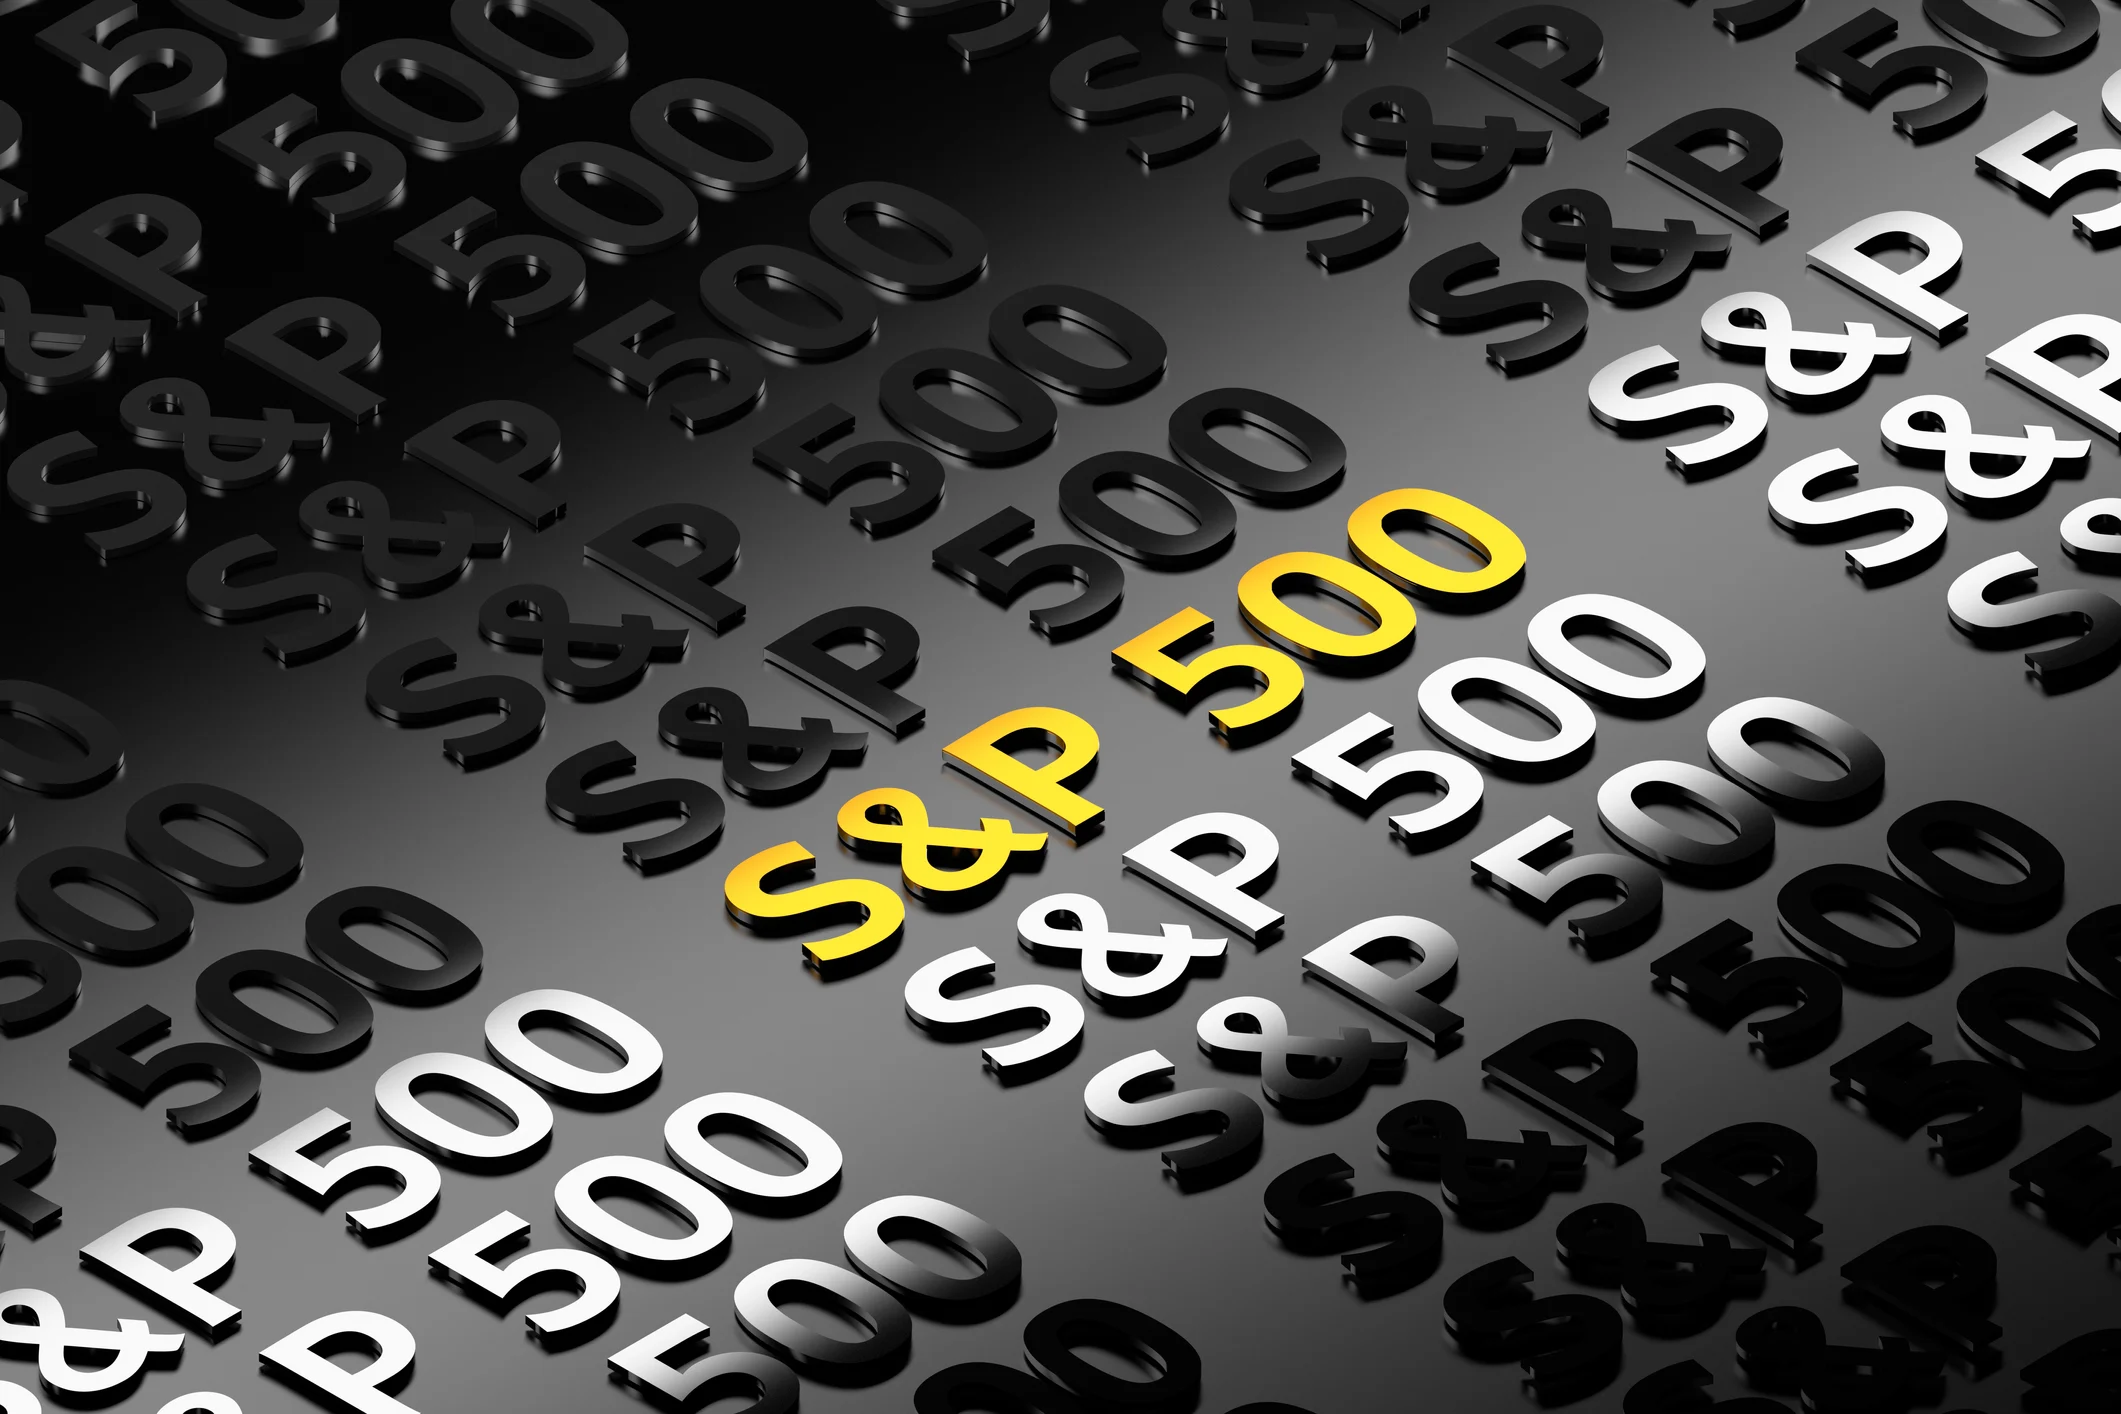

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import glob

In [4]:
glob.glob(r'C:\Users\falgu\Downloads\individual_stocks_5yr-20241003T080828Z-001\individual_stocks_5yr/*csv')

['C:\\Users\\falgu\\Downloads\\individual_stocks_5yr-20241003T080828Z-001\\individual_stocks_5yr\\AAL_data.csv',
 'C:\\Users\\falgu\\Downloads\\individual_stocks_5yr-20241003T080828Z-001\\individual_stocks_5yr\\AAPL_data.csv',
 'C:\\Users\\falgu\\Downloads\\individual_stocks_5yr-20241003T080828Z-001\\individual_stocks_5yr\\AAP_data.csv',
 'C:\\Users\\falgu\\Downloads\\individual_stocks_5yr-20241003T080828Z-001\\individual_stocks_5yr\\ABBV_data.csv',
 'C:\\Users\\falgu\\Downloads\\individual_stocks_5yr-20241003T080828Z-001\\individual_stocks_5yr\\ABC_data.csv',
 'C:\\Users\\falgu\\Downloads\\individual_stocks_5yr-20241003T080828Z-001\\individual_stocks_5yr\\ABT_data.csv',
 'C:\\Users\\falgu\\Downloads\\individual_stocks_5yr-20241003T080828Z-001\\individual_stocks_5yr\\ACN_data.csv',
 'C:\\Users\\falgu\\Downloads\\individual_stocks_5yr-20241003T080828Z-001\\individual_stocks_5yr\\ADBE_data.csv',
 'C:\\Users\\falgu\\Downloads\\individual_stocks_5yr-20241003T080828Z-001\\individual_stocks_

In [5]:
len(glob.glob(r'C:\Users\falgu\Downloads\individual_stocks_5yr-20241003T080828Z-001\individual_stocks_5yr/*csv'))

509

In [6]:
company_list = [
    r'C:\\Users\\falgu\\Downloads\\individual_stocks_5yr-20241003T080828Z-001\\individual_stocks_5yr\\AAPL_data.csv', 
    r'C:\\Users\\falgu\\Downloads\\individual_stocks_5yr-20241003T080828Z-001\\individual_stocks_5yr\\GOOG_data.csv',
    r'C:\\Users\\falgu\\Downloads\\individual_stocks_5yr-20241003T080828Z-001\\individual_stocks_5yr\\AMZN_data.csv',
    r'C:\\Users\\falgu\\Downloads\\individual_stocks_5yr-20241003T080828Z-001\\individual_stocks_5yr\\MSFT_data.csv'
]

In [7]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [8]:
all_data = pd.DataFrame()
for file in company_list:
    current_df = pd.read_csv(file)
    all_data = pd.concat([all_data, current_df], ignore_index=True)

In [9]:
 for file in company_list:
    print(f"Trying: {file}")
    current_df = pd.read_csv(file)

Trying: C:\\Users\\falgu\\Downloads\\individual_stocks_5yr-20241003T080828Z-001\\individual_stocks_5yr\\AAPL_data.csv
Trying: C:\\Users\\falgu\\Downloads\\individual_stocks_5yr-20241003T080828Z-001\\individual_stocks_5yr\\GOOG_data.csv
Trying: C:\\Users\\falgu\\Downloads\\individual_stocks_5yr-20241003T080828Z-001\\individual_stocks_5yr\\AMZN_data.csv
Trying: C:\\Users\\falgu\\Downloads\\individual_stocks_5yr-20241003T080828Z-001\\individual_stocks_5yr\\MSFT_data.csv


In [10]:
import os

for file in company_list:
    if os.path.exists(file):
        current_df = pd.read_csv(file)
        all_data = pd.concat([all_data, current_df], ignore_index=True)
    else:
        print(f"Missing file: {file}")

In [11]:
all_data.shape

(9504, 7)

In [12]:
all_data.head(6)

date     open     high      low    close     volume  Name
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL
4  2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL
5  2013-02-15  66.9785  67.1656  65.7028  65.7371   97924631  AAPL

In [13]:
all_data['Name'].unique()

array(['AAPL', 'GOOG', 'AMZN', 'MSFT'], dtype=object)

## Change in price of the stock overtime

In [15]:
all_data.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [16]:
all_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [17]:
all_data['date'] = pd.to_datetime(all_data['date'])

In [18]:
 all_data['date']

0      2013-02-08
1      2013-02-11
2      2013-02-12
3      2013-02-13
4      2013-02-14
          ...    
9499   2018-02-01
9500   2018-02-02
9501   2018-02-05
9502   2018-02-06
9503   2018-02-07
Name: date, Length: 9504, dtype: datetime64[ns]

In [19]:
tech_list = all_data['Name'].unique()

In [20]:
tech_list

array(['AAPL', 'GOOG', 'AMZN', 'MSFT'], dtype=object)

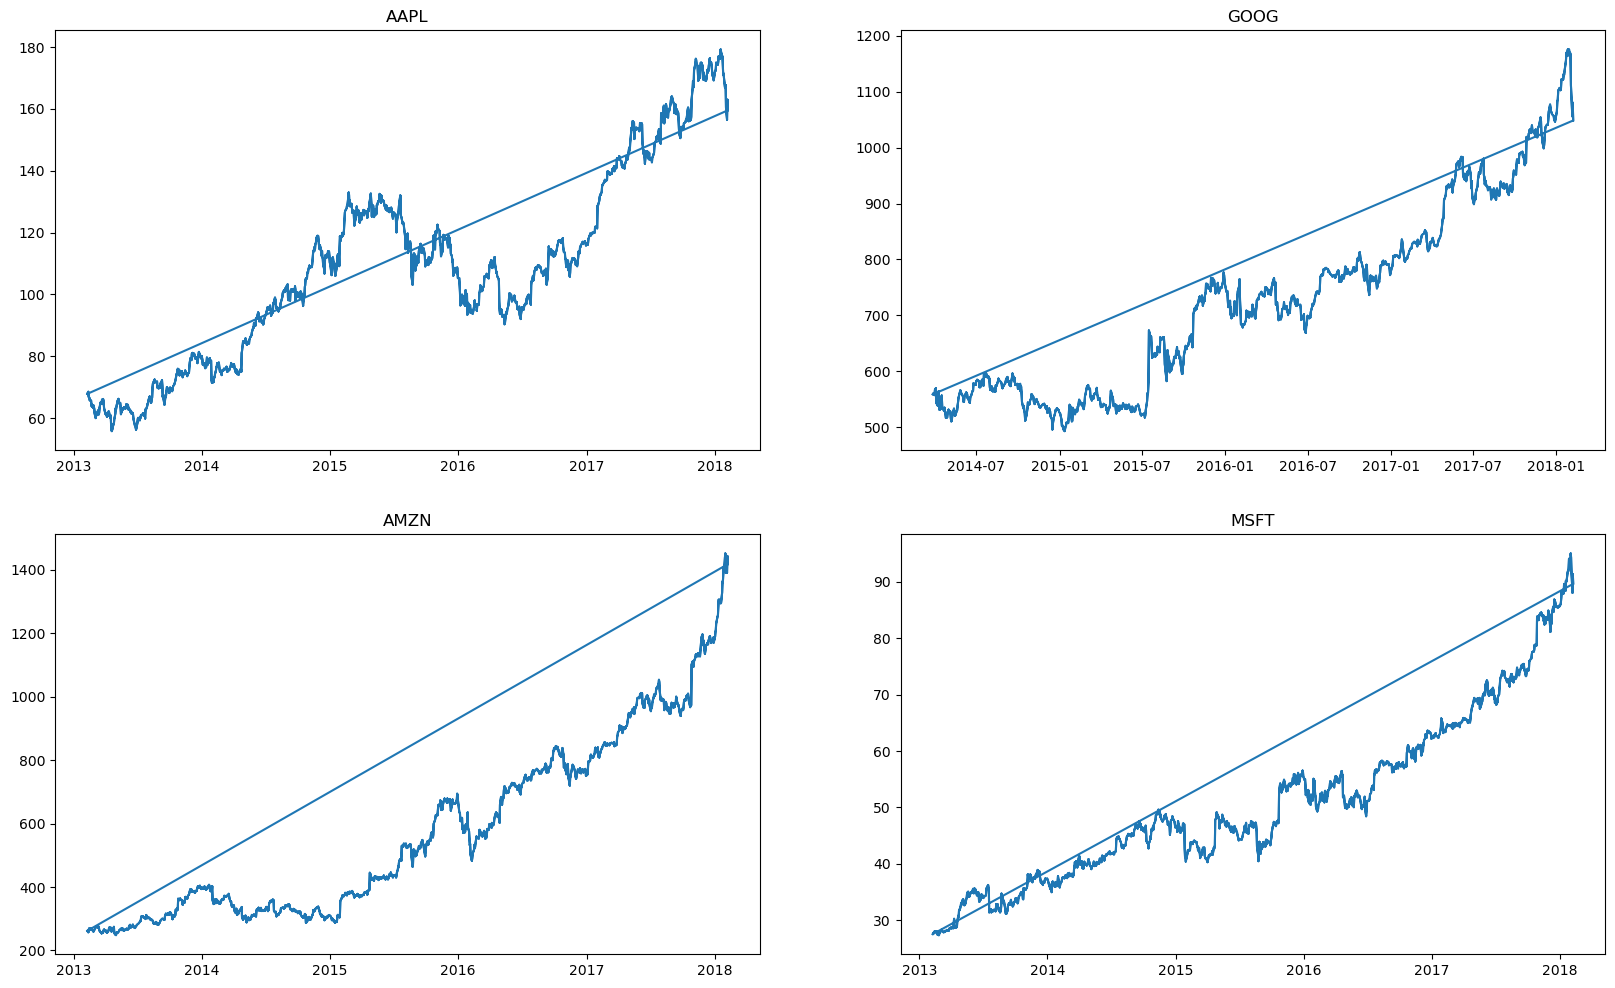

In [21]:
plt.figure(figsize=(20,12))

for index,company in enumerate(tech_list, 1):
    plt.subplot(2 ,2 , index)
    filter1 = all_data['Name']==company
    df = all_data[filter1]
    plt.plot(df['date'],df['close'])
    plt.title(company)

## Moving average of the various stocks

In [23]:
all_data.head(15)

date     open     high      low    close     volume  Name
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL
4  2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL
5  2013-02-15  66.9785  67.1656  65.7028  65.7371   97924631  AAPL
6  2013-02-19  65.8714  66.1042  64.8356  65.7128  108854046  AAPL
7  2013-02-20  65.3842  65.3842  64.1142  64.1214  118891367  AAPL
8  2013-02-21  63.7142  64.1671  63.2599  63.7228  111596821  AAPL
9  2013-02-22  64.1785  64.5142  63.7999  64.4014   82583823  AAPL
10 2013-02-25  64.8356  65.0171  63.2242  63.2571   92899597  AAPL
11 2013-02-26  63.4028  64.5056  62.5228  64.1385  125096657  AAPL
12 2013-02-27  64.0614  64.6342  62.9499  63.5099  146674682  AAPL
13 2013-02-28  63.4357  63.9814  63.0571  63.0571   80532382  AAPL
14 2013-03-01  62.5714  62.5971  61.4257  61.4957  137899041  AAPL

In [24]:
all_data['close'].rolling(window=10).mean().head(14)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9     66.03251
10    65.57280
11    65.13051
12    64.79722
13    64.43137
Name: close, dtype: float64

In [25]:
new_data = all_data.copy()

In [26]:
ma_day = [10, 20, 50]
for ma in ma_day:
    new_data['close_'+str(ma)] = new_data['close'].rolling(ma).mean()

In [27]:
new_data.tail(7)

date   open    high      low  close    volume  Name  close_10  \
9497 2018-01-30  93.30  93.660  92.1000  92.74  38635053  MSFT    91.862   
9498 2018-01-31  93.75  95.400  93.5100  95.01  48756338  MSFT    92.349   
9499 2018-02-01  94.79  96.070  93.5813  94.26  47227882  MSFT    92.765   
9500 2018-02-02  93.64  93.970  91.5000  91.78  47867753  MSFT    92.943   
9501 2018-02-05  90.56  93.240  88.0000  88.00  51031465  MSFT    92.582   
9502 2018-02-06  86.89  91.475  85.2500  91.33  67998564  MSFT    92.525   
9503 2018-02-07  90.49  91.770  89.2000  89.61  41107592  MSFT    92.304   

      close_20  close_50  
9497   89.8285   86.5244  
9498   90.2815   86.7606  
9499   90.6770   86.9978  
9500   90.9105   87.1828  
9501   90.9010   87.2684  
9502   91.0535   87.4328  
9503   91.1230   87.5598

In [28]:
new_data.set_index('date', inplace=True)

In [29]:
new_data

open     high      low    close     volume  Name  close_10  \
date                                                                        
2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL       NaN   
2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL       NaN   
2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL       NaN   
2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL       NaN   
2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL       NaN   
...             ...      ...      ...      ...        ...   ...       ...   
2018-02-01  94.7900  96.0700  93.5813  94.2600   47227882  MSFT    92.765   
2018-02-02  93.6400  93.9700  91.5000  91.7800   47867753  MSFT    92.943   
2018-02-05  90.5600  93.2400  88.0000  88.0000   51031465  MSFT    92.582   
2018-02-06  86.8900  91.4750  85.2500  91.3300   67998564  MSFT    92.525   
2018-02-07  90.4900  91.7700  89.2000  89.6100   41107592  MSFT    92.304   

            close_20  close_50  
date                            
2013-02-08       NaN       NaN  
2013-02-11       NaN       NaN  
2013-02-12       NaN       NaN  
2013-02-13       NaN       NaN  
2013-02-14       NaN       NaN  
...              ...       ...  
2018-02-01   90.6770   86.9978  
2018-02-02   90.9105   87.1828  
2018-02-05   90.9010   87.2684  
2018-02-06   91.0535   87.4328  
2018-02-07   91.1230   87.5598  

[9504 rows x 9 columns]

In [30]:
new_data.columns

Index(['open', 'high', 'low', 'close', 'volume', 'Name', 'close_10',
       'close_20', 'close_50'],
      dtype='object')

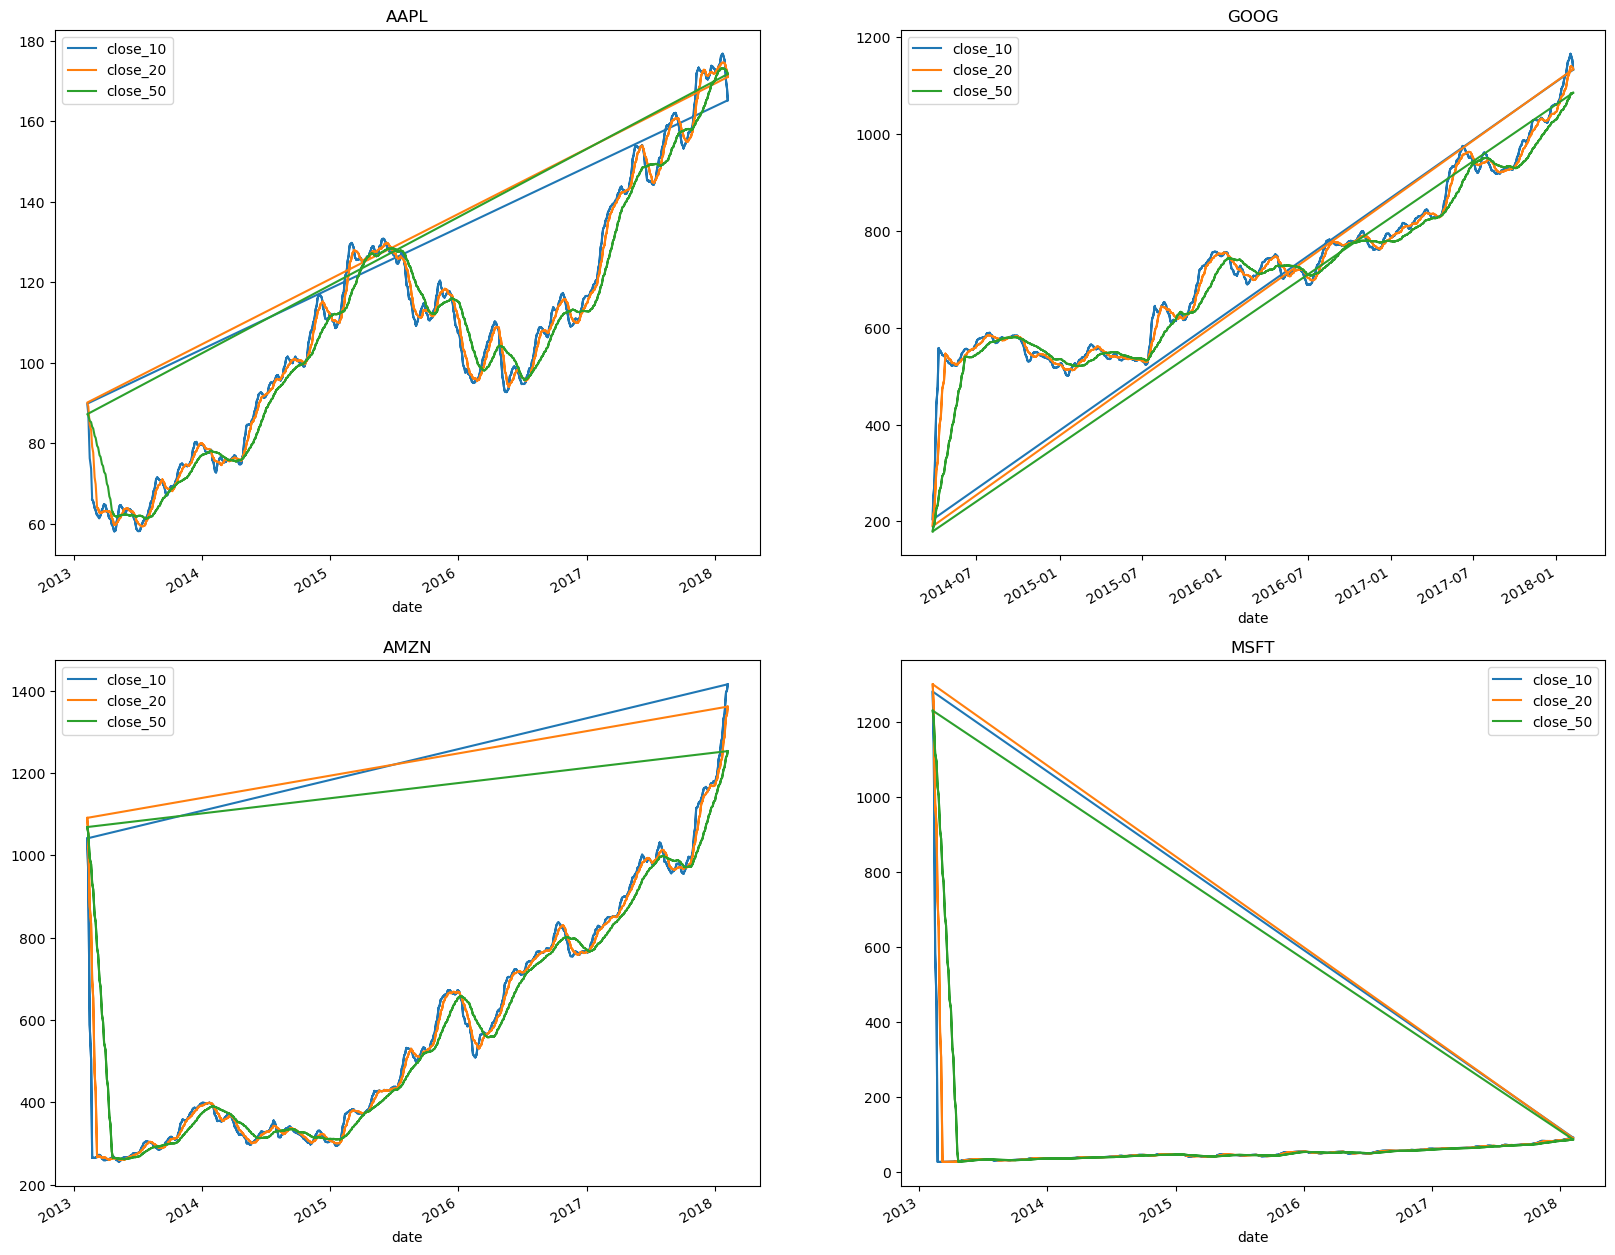

In [31]:
plt.figure(figsize=(20,17))

for index,company in enumerate(tech_list, 1):
    plt.subplot(2 ,2 , index)
    filter1 = new_data['Name']==company
    df = new_data[filter1]
    df[['close_10', 'close_20','close_50']].plot(ax=plt.gca())
    plt.title(company)

## Analyzing CLOSING price change in Apple stock 

In [33]:
company_list

['C:\\\\Users\\\\falgu\\\\Downloads\\\\individual_stocks_5yr-20241003T080828Z-001\\\\individual_stocks_5yr\\\\AAPL_data.csv',
 'C:\\\\Users\\\\falgu\\\\Downloads\\\\individual_stocks_5yr-20241003T080828Z-001\\\\individual_stocks_5yr\\\\GOOG_data.csv',
 'C:\\\\Users\\\\falgu\\\\Downloads\\\\individual_stocks_5yr-20241003T080828Z-001\\\\individual_stocks_5yr\\\\AMZN_data.csv',
 'C:\\\\Users\\\\falgu\\\\Downloads\\\\individual_stocks_5yr-20241003T080828Z-001\\\\individual_stocks_5yr\\\\MSFT_data.csv']

In [34]:
apple = pd.read_csv(r'C:\\Users\\falgu\\Downloads\\individual_stocks_5yr-20241003T080828Z-001\\individual_stocks_5yr\\AAPL_data.csv', 
)

In [35]:
apple.head(4)

date     open     high      low    close     volume  Name
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL

In [36]:
apple['Daily return (in %)'] = apple['close'].pct_change()* 100

In [37]:
apple.head(4)

date     open     high      low    close     volume  Name  \
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL   
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL   
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL   
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL   

   Daily return (in %)  
0                  NaN  
1             1.042235  
2            -2.506658  
3            -0.190297

In [38]:
import plotly.express as px

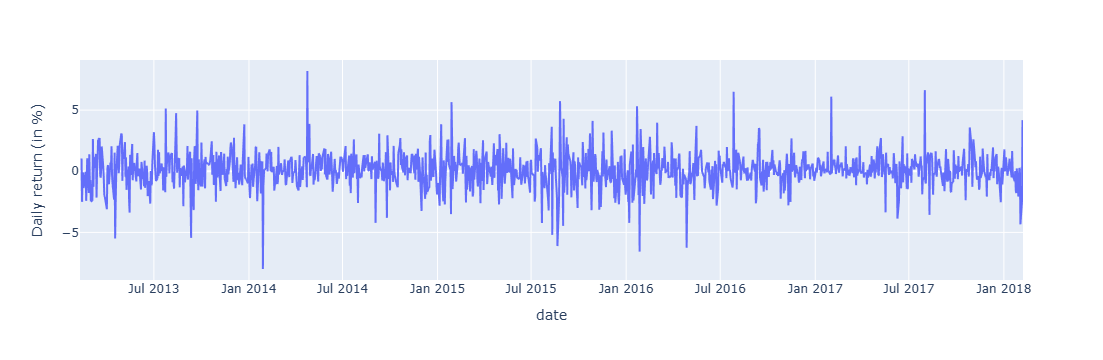

In [39]:
px.line(apple, x="date", y="Daily return (in %)")

## Resampling analysis of closing price

In [41]:
apple['date'] =pd.to_datetime(apple['date'])

In [42]:
apple.dtypes

date                   datetime64[ns]
open                          float64
high                          float64
low                           float64
close                         float64
volume                          int64
Name                           object
Daily return (in %)           float64
dtype: object

In [43]:
apple.head(4)

date     open     high      low    close     volume  Name  \
0 2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL   
1 2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL   
2 2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL   
3 2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL   

   Daily return (in %)  
0                  NaN  
1             1.042235  
2            -2.506658  
3            -0.190297

In [44]:
apple.set_index('date', inplace=True)

In [45]:
apple.head(4)

open     high      low    close     volume  Name  \
date                                                              
2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL   
2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL   
2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL   
2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL   

            Daily return (in %)  
date                             
2013-02-08                  NaN  
2013-02-11             1.042235  
2013-02-12            -2.506658  
2013-02-13            -0.190297

In [46]:
apple['close'].resample('M').mean()

date
2013-02-28     65.306264
2013-03-31     63.120110
2013-04-30     59.966432
2013-05-31     63.778927
2013-06-30     60.791120
                 ...    
2017-10-31    157.817273
2017-11-30    172.406190
2017-12-31    171.891500
2018-01-31    174.005238
2018-02-28    161.468000
Freq: ME, Name: close, Length: 61, dtype: float64

<Axes: xlabel='date'>

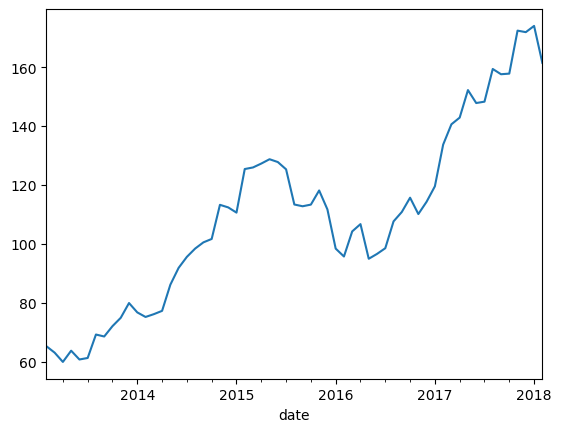

In [47]:
apple['close'].resample('M').mean().plot()

In [48]:
apple['close'].resample('Y').mean()

date
2013-12-31     67.237839
2014-12-31     92.264531
2015-12-31    120.039861
2016-12-31    104.604008
2017-12-31    150.585080
2018-12-31    171.594231
Freq: YE-DEC, Name: close, dtype: float64

<Axes: xlabel='date'>

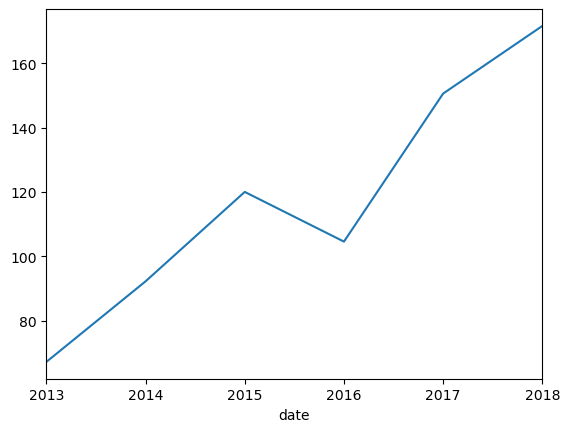

In [49]:
apple['close'].resample('Y').mean().plot()

In [50]:
apple['close'].resample('Q').mean()

date
2013-03-31     64.020291
2013-06-30     61.534692
2013-09-30     66.320670
2013-12-31     75.567478
2014-03-31     76.086293
2014-06-30     85.117475
2014-09-30     98.163311
2014-12-31    108.821016
2015-03-31    120.776721
2015-06-30    127.937937
2015-09-30    117.303438
2015-12-31    114.299297
2016-03-31     99.655082
2016-06-30     99.401250
2016-09-30    105.866094
2016-12-31    113.399048
2017-03-31    131.712500
2017-06-30    147.875397
2017-09-30    155.304603
2017-12-31    167.148254
2018-03-31    171.594231
Freq: QE-DEC, Name: close, dtype: float64

<Axes: xlabel='date'>

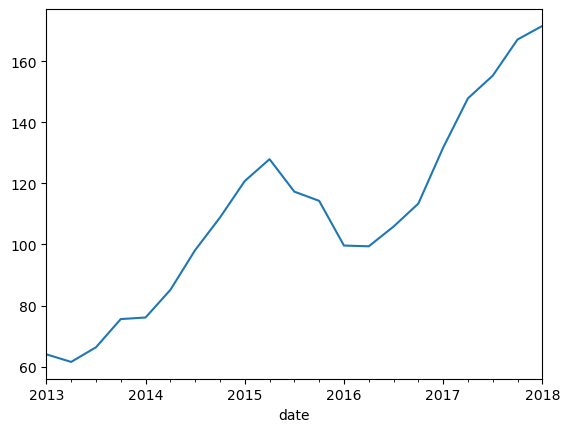

In [51]:
apple['close'].resample('Q').mean().plot()

## Check if Closing price of these companies are correlated or not 

In [53]:
company_list

['C:\\\\Users\\\\falgu\\\\Downloads\\\\individual_stocks_5yr-20241003T080828Z-001\\\\individual_stocks_5yr\\\\AAPL_data.csv',
 'C:\\\\Users\\\\falgu\\\\Downloads\\\\individual_stocks_5yr-20241003T080828Z-001\\\\individual_stocks_5yr\\\\GOOG_data.csv',
 'C:\\\\Users\\\\falgu\\\\Downloads\\\\individual_stocks_5yr-20241003T080828Z-001\\\\individual_stocks_5yr\\\\AMZN_data.csv',
 'C:\\\\Users\\\\falgu\\\\Downloads\\\\individual_stocks_5yr-20241003T080828Z-001\\\\individual_stocks_5yr\\\\MSFT_data.csv']

In [54]:
company_list[0]

'C:\\\\Users\\\\falgu\\\\Downloads\\\\individual_stocks_5yr-20241003T080828Z-001\\\\individual_stocks_5yr\\\\AAPL_data.csv'

In [55]:
app = pd.read_csv(company_list[0])
amzn = pd.read_csv(company_list[1])
google = pd.read_csv(company_list[2])
msft = pd.read_csv(company_list[3])

In [56]:
closing_price = pd.DataFrame()

In [57]:
closing_price['apple_close'] = app['close']
closing_price['amzn_close'] = amzn['close']
closing_price['goog_close'] = google['close']
closing_price['msft_close'] = msft['close']

In [58]:
closing_price

apple_close  amzn_close  goog_close  msft_close
0         67.8542      558.46      261.95       27.55
1         68.5614      559.99      257.21       27.86
2         66.8428      556.97      258.70       27.88
3         66.7156      567.16      269.47       28.03
4         66.6556      567.00      269.24       28.04
...           ...         ...         ...         ...
1254     167.7800         NaN     1390.00       94.26
1255     160.5000         NaN     1429.95       91.78
1256     156.4900         NaN     1390.00       88.00
1257     163.0300         NaN     1442.84       91.33
1258     159.5400         NaN     1416.78       89.61

[1259 rows x 4 columns]

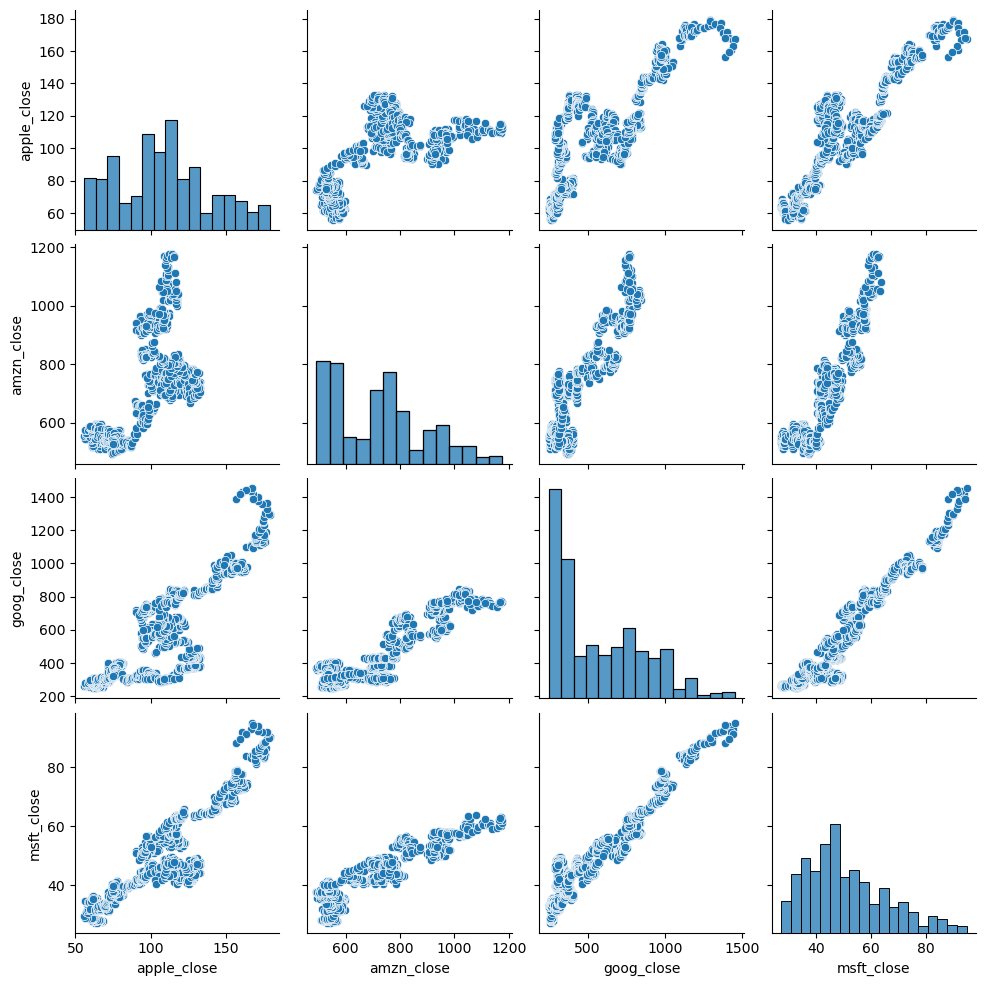

In [59]:
sns.pairplot(closing_price)

In [60]:
closing_price.corr()

apple_close  amzn_close  goog_close  msft_close
apple_close     1.000000    0.640522    0.819078    0.899689
amzn_close      0.640522    1.000000    0.888456    0.907011
goog_close      0.819078    0.888456    1.000000    0.955977
msft_close      0.899689    0.907011    0.955977    1.000000

<Axes: >

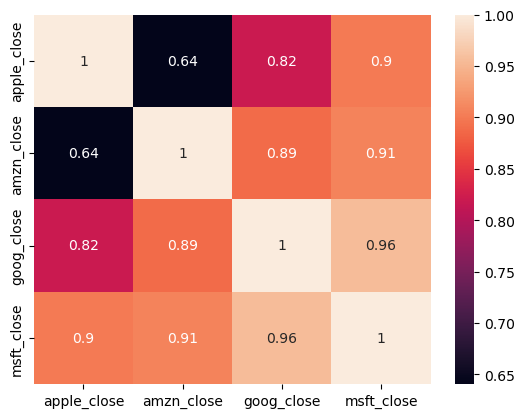

In [61]:
sns.heatmap(closing_price.corr(), annot=True)

In [62]:
closing_price

apple_close  amzn_close  goog_close  msft_close
0         67.8542      558.46      261.95       27.55
1         68.5614      559.99      257.21       27.86
2         66.8428      556.97      258.70       27.88
3         66.7156      567.16      269.47       28.03
4         66.6556      567.00      269.24       28.04
...           ...         ...         ...         ...
1254     167.7800         NaN     1390.00       94.26
1255     160.5000         NaN     1429.95       91.78
1256     156.4900         NaN     1390.00       88.00
1257     163.0300         NaN     1442.84       91.33
1258     159.5400         NaN     1416.78       89.61

[1259 rows x 4 columns]

In [63]:
closing_price['apple_close']

0        67.8542
1        68.5614
2        66.8428
3        66.7156
4        66.6556
          ...   
1254    167.7800
1255    160.5000
1256    156.4900
1257    163.0300
1258    159.5400
Name: apple_close, Length: 1259, dtype: float64

In [64]:
closing_price['apple_close'].shift(1)

0            NaN
1        67.8542
2        68.5614
3        66.8428
4        66.7156
          ...   
1254    167.4300
1255    167.7800
1256    160.5000
1257    156.4900
1258    163.0300
Name: apple_close, Length: 1259, dtype: float64

In [65]:
(closing_price['apple_close'] - closing_price['apple_close'].shift(1))/closing_price['apple_close'].shift(1) * 100

0            NaN
1       1.042235
2      -2.506658
3      -0.190297
4      -0.089934
          ...   
1254    0.209043
1255   -4.339015
1256   -2.498442
1257    4.179181
1258   -2.140710
Name: apple_close, Length: 1259, dtype: float64

In [66]:
for col in closing_price.columns:
    closing_price[col + '_pct_change'] = (closing_price[col] - closing_price[col].shift(1))/closing_price[col].shift(1) * 100

In [67]:
closing_price

apple_close  amzn_close  goog_close  msft_close  apple_close_pct_change  \
0         67.8542      558.46      261.95       27.55                     NaN   
1         68.5614      559.99      257.21       27.86                1.042235   
2         66.8428      556.97      258.70       27.88               -2.506658   
3         66.7156      567.16      269.47       28.03               -0.190297   
4         66.6556      567.00      269.24       28.04               -0.089934   
...           ...         ...         ...         ...                     ...   
1254     167.7800         NaN     1390.00       94.26                0.209043   
1255     160.5000         NaN     1429.95       91.78               -4.339015   
1256     156.4900         NaN     1390.00       88.00               -2.498442   
1257     163.0300         NaN     1442.84       91.33                4.179181   
1258     159.5400         NaN     1416.78       89.61               -2.140710   

      amzn_close_pct_change  goog_close_pct_change  msft_close_pct_change  
0                       NaN                    NaN                    NaN  
1                  0.273968              -1.809506               1.125227  
2                 -0.539295               0.579293               0.071788  
3                  1.829542               4.163123               0.538020  
4                 -0.028211              -0.085353               0.035676  
...                     ...                    ...                    ...  
1254                    NaN              -4.196734              -0.789391  
1255                    NaN               2.874101              -2.631021  
1256                    NaN              -2.793804              -4.118544  
1257                    NaN               3.801439               3.784091  
1258                    NaN              -1.806160              -1.883280  

[1259 rows x 8 columns]

In [68]:
closing_price.columns

Index(['apple_close', 'amzn_close', 'goog_close', 'msft_close',
       'apple_close_pct_change', 'amzn_close_pct_change',
       'goog_close_pct_change', 'msft_close_pct_change'],
      dtype='object')

In [69]:
clsing_p = closing_price[['apple_close_pct_change', 'amzn_close_pct_change',
       'goog_close_pct_change', 'msft_close_pct_change']]

In [70]:
clsing_p

apple_close_pct_change  amzn_close_pct_change  goog_close_pct_change  \
0                        NaN                    NaN                    NaN   
1                   1.042235               0.273968              -1.809506   
2                  -2.506658              -0.539295               0.579293   
3                  -0.190297               1.829542               4.163123   
4                  -0.089934              -0.028211              -0.085353   
...                      ...                    ...                    ...   
1254                0.209043                    NaN              -4.196734   
1255               -4.339015                    NaN               2.874101   
1256               -2.498442                    NaN              -2.793804   
1257                4.179181                    NaN               3.801439   
1258               -2.140710                    NaN              -1.806160   

      msft_close_pct_change  
0                       NaN  
1                  1.125227  
2                  0.071788  
3                  0.538020  
4                  0.035676  
...                     ...  
1254              -0.789391  
1255              -2.631021  
1256              -4.118544  
1257               3.784091  
1258              -1.883280  

[1259 rows x 4 columns]

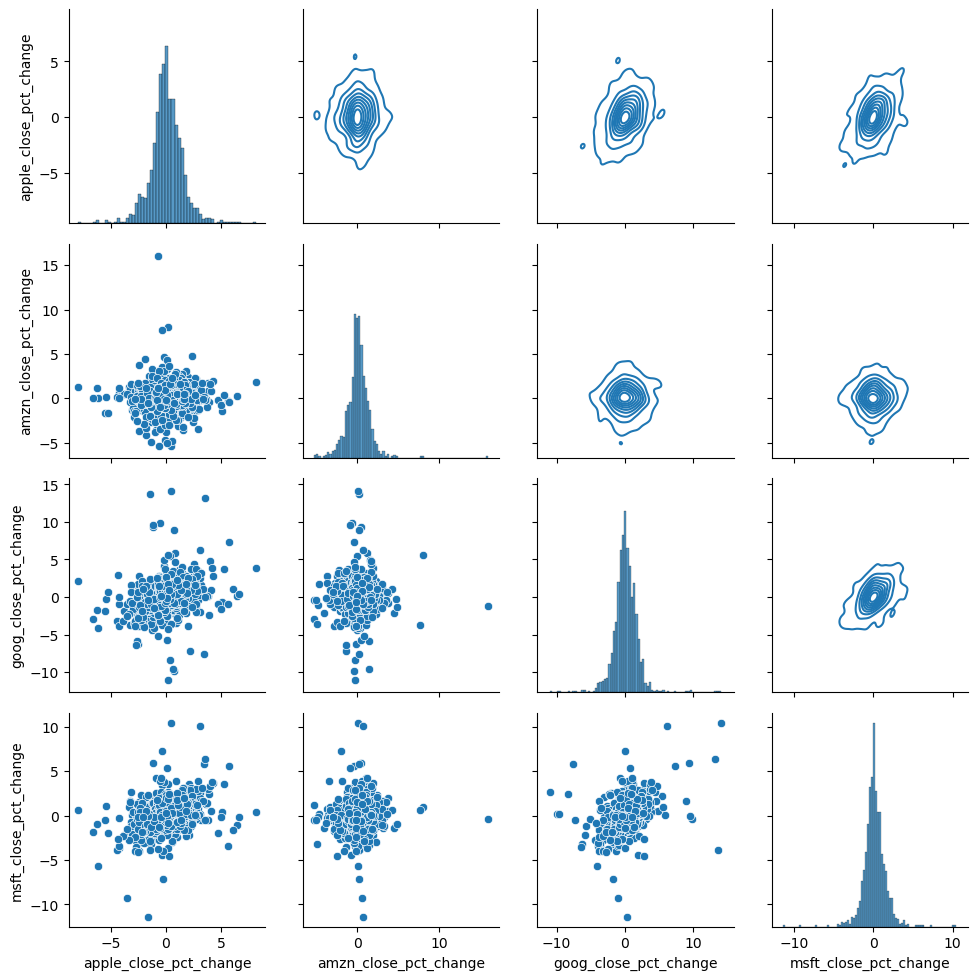

In [71]:
g = sns.PairGrid(data= clsing_p)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot)

In [72]:
clsing_p.corr()

apple_close_pct_change  amzn_close_pct_change  \
apple_close_pct_change                1.000000               0.036202   
amzn_close_pct_change                 0.036202               1.000000   
goog_close_pct_change                 0.287659               0.027698   
msft_close_pct_change                 0.366598               0.038939   

                        goog_close_pct_change  msft_close_pct_change  
apple_close_pct_change               0.287659               0.366598  
amzn_close_pct_change                0.027698               0.038939  
goog_close_pct_change                1.000000               0.402678  
msft_close_pct_change                0.402678               1.000000